In [87]:
#Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from prophet import Prophet
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [5]:
cases_ww = pd.read_csv(r"C:\Users\hch0a\OneDrive\Desktop\Monkeypox\Data\Monkey_Pox_Cases_Worldwide.csv")
daily_case_ww= pd.read_csv(r"C:\Users\hch0a\OneDrive\Desktop\Monkeypox\Data\Daily_Country_Wise_Confirmed_Cases.csv")
cases_timeline =pd.read_csv(r"C:\Users\hch0a\OneDrive\Desktop\Monkeypox\Data\Worldwide_Case_Detection_Timeline.csv")

In [16]:
cases_ww.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3412.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7083.0,0.0,13.0,2.0,0.0
3,United States,24403.0,0.0,4.0,41.0,11.0
4,Canada,1388.0,12.0,1.0,5.0,0.0


In [17]:
daily_case_ww.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,29,0,0


In [18]:
cases_timeline.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [13]:
#Top 5 country by Confermed cases
cases_ww.sort_values(by="Confirmed_Cases",ascending=False)[["Country","Confirmed_Cases"]][:7]

,Country,Confirmed_Cases
3,United States,24403.0
37,Brazil,7300.0
2,Spain,7083.0
7,France,3934.0
10,Germany,3590.0
0,England,3412.0
36,Peru,2251.0


In [14]:
#top 5 countrys by Hospitalization
cases_ww.sort_values(by="Hospitalized",ascending=False)[["Country","Confirmed_Cases","Hospitalized"]][:5]

,Country,Confirmed_Cases,Hospitalized
10,Germany,3590.0,18.0
6,Italy,837.0,18.0
2,Spain,7083.0,13.0
70,Singapore,19.0,8.0
61,Romania,39.0,7.0


In [15]:
#top 3 country by Suspected_Cases
cases_ww.sort_values(by="Suspected_Cases",ascending=False)[["Country","Confirmed_Cases","Suspected_Cases"]][:5]

,Country,Confirmed_Cases,Suspected_Cases
123,Democratic Republic Of The Congo,195.0,2852.0
122,Nigeria,277.0,427.0
52,Ghana,84.0,317.0
126,Cameroon,7.0,27.0
4,Canada,1388.0,12.0


In [28]:
case_timeline =pd.DataFrame(cases_timeline[["Country","Date_confirmation"]].drop_duplicates())
print("first case was identified on:",case_timeline)

first case was identified on:                         Country Date_confirmation
0                       Nigeria        2022-01-31
3                      Cameroon        2022-02-17
6                       Nigeria        2022-02-28
7      Central African Republic        2022-03-04
9                       Nigeria        2022-03-31
...                         ...               ...
65235                   Germany        2022-09-22
65240             United States        2022-09-22
65241                    Greece        2022-09-22
65280                    Brazil        2022-09-22
65463               Puerto Rico        2022-09-22

[1721 rows x 2 columns]


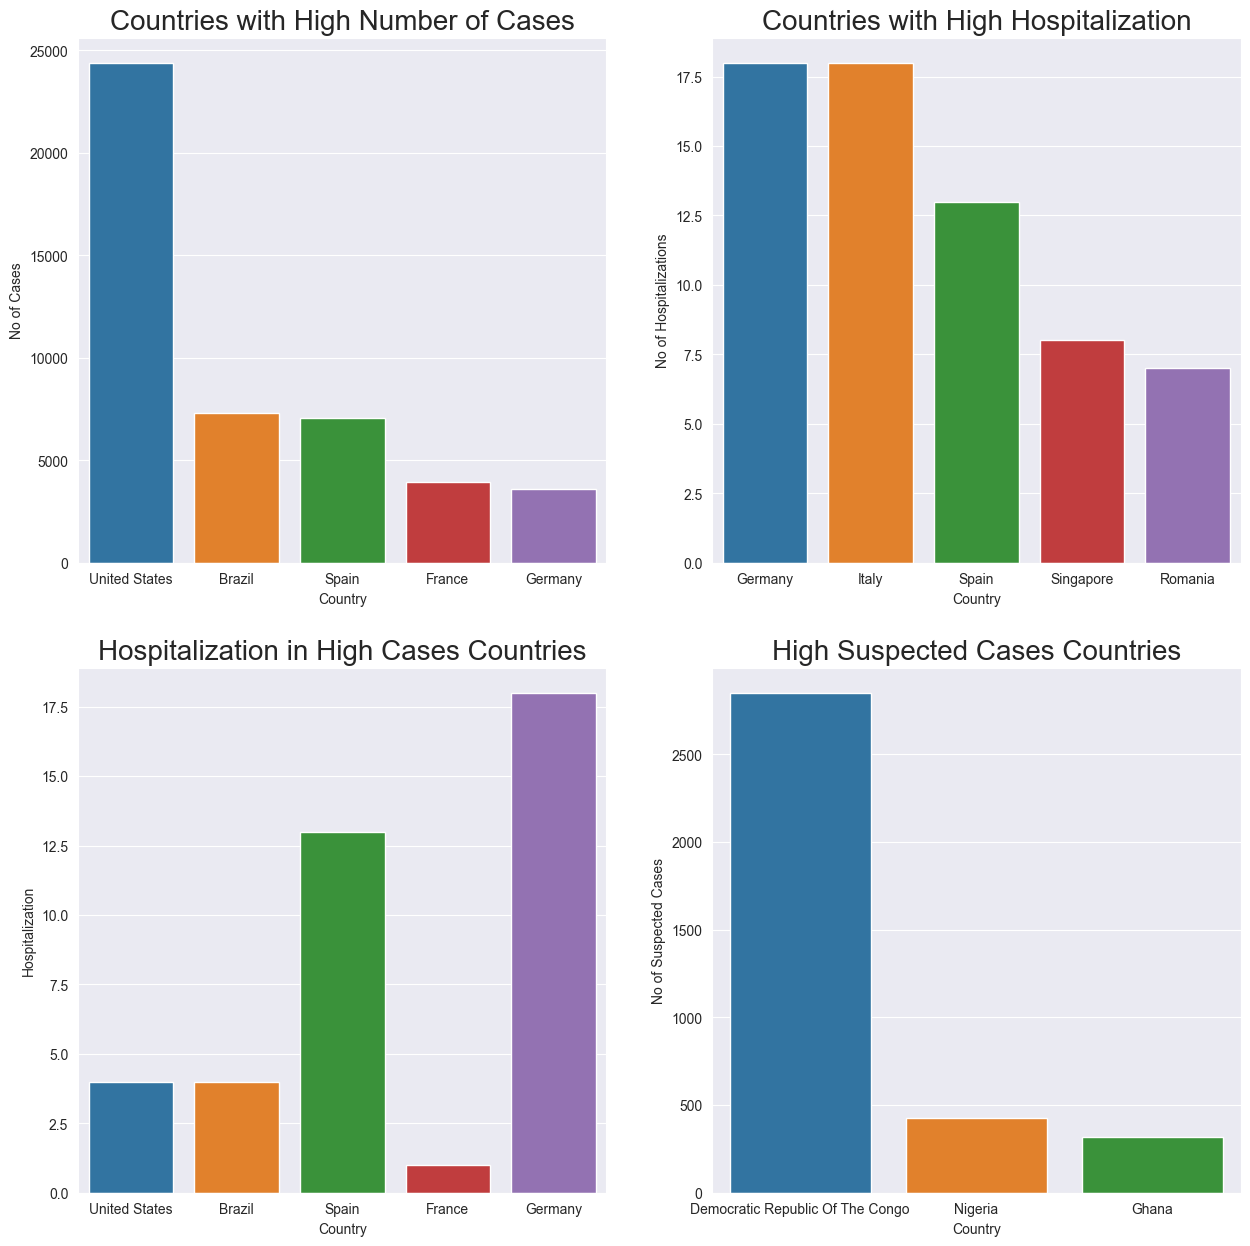

In [43]:
plt.figure(figsize=(15,15))
sns.set_style("darkgrid")

plt.subplot(2,2,1)
topCotop_confirm = cases_ww.sort_values(by="Confirmed_Cases", ascending=False)[:5]
sns.barplot(x=top_confirm["Country"], y=top_confirm["Confirmed_Cases"])
plt.title("Countries with High Number of Cases", fontdict={'fontsize': 20})
plt.ylabel("No of Cases")
#####################################
plt.subplot(2,2,2)
case_hospitol = cases_ww.sort_values(by="Hospitalized",ascending=False )[["Confirmed_Cases","Hospitalized","Country"]][:5]
sns.barplot(x=case_hospitol["Country"],y=case_hospitol["Hospitalized"])
plt.title("Countries with High Hospitalization",fontdict={'fontsize': 20,})
plt.ylabel("No of Hospitalizations")
####################################
plt.subplot(2,2,3)
sns.barplot(x=top_confirm["Country"],y=top_confirm["Hospitalized"]);
plt.title("Hospitalization in High Cases Countries",fontdict={'fontsize': 20,});
plt.ylabel("Hospitalization");
##################################3

plt.subplot(2,2,4)
sus_case = cases_ww.sort_values(by="Suspected_Cases",ascending=False)[:3][["Suspected_Cases","Country"]]
sns.barplot( x=sus_case["Country"], y=sus_case["Suspected_Cases"],);
plt.title("High Suspected Cases Countries",fontdict={'fontsize': 20,});
plt.ylabel("No of Suspected Cases");


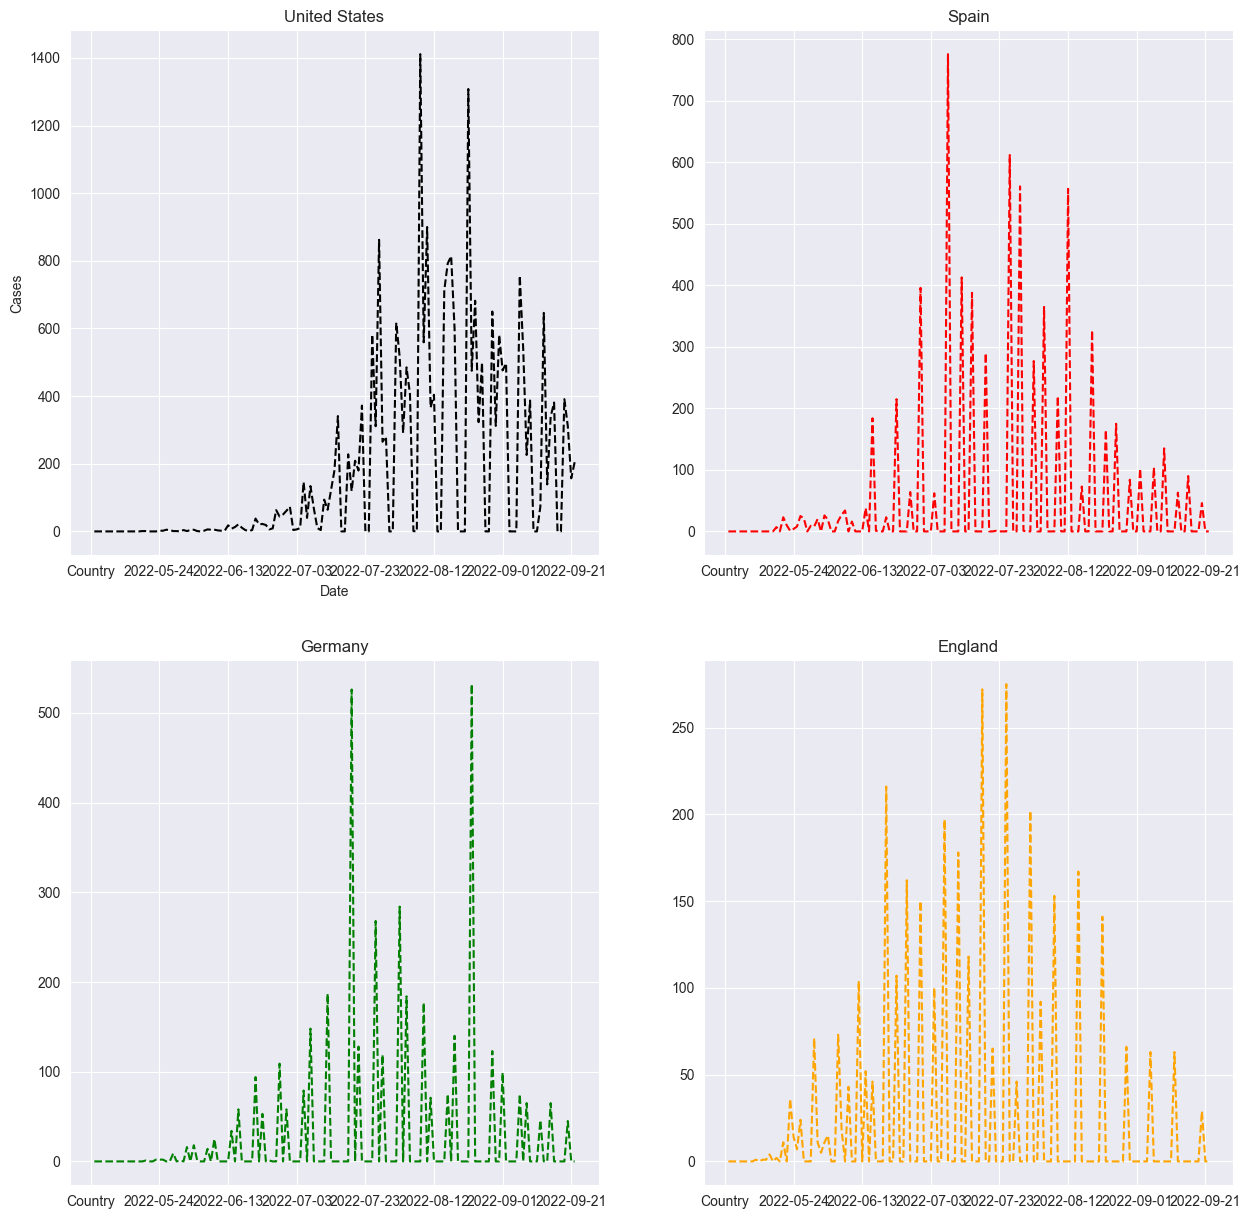

In [50]:
plt.figure(figsize=(15,15))
#USA
plt.subplot(2,2,1)
us_data = daily_case_ww.iloc[8]
us_data = pd.to_numeric(us_data, errors='coerce')
us_data.plot(kind = "line",ls= "--", color = 'black')
plt.title("United States");
plt.xlabel("Date")
plt.ylabel("Cases");

#Spain
plt.subplot(2,2,2)

spdata=daily_case_ww.iloc[7]
spdata = pd.to_numeric(spdata, errors='coerce')
spdata.plot(kind = "line", ls= "--", color = "red")
plt.title("Spain");

#Germany
plt.subplot(2,2,3)
grdata=daily_case_ww.iloc[11]
grdata = pd.to_numeric(grdata, errors='coerce')
grdata.plot(ls="--",color = "green")
plt.title("Germany");

#England
plt.subplot(2,2,4)
endata=daily_case_ww.iloc[4]
endata = pd.to_numeric(endata, errors='coerce')
endata.plot(ls="--",color = "orange")
plt.title("England");

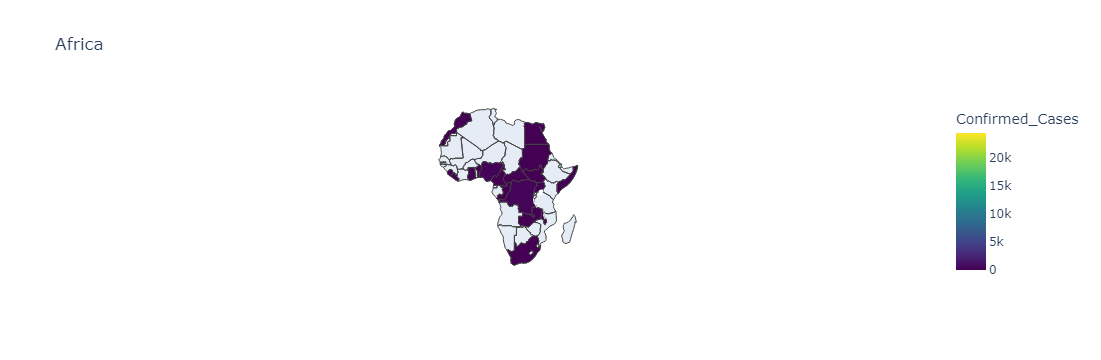

In [52]:
fig = px.choropleth(cases_ww,locations= cases_ww["Country"], color_continuous_scale="Viridis", scope= "africa",
                    locationmode="country names", color="Confirmed_Cases", title="Africa")
fig.show()

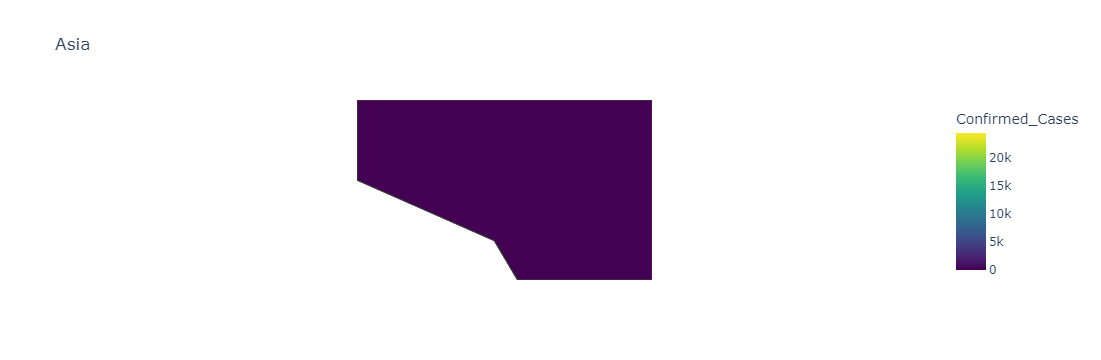

In [53]:
fig = px.choropleth(cases_ww,locations= cases_ww["Country"], color_continuous_scale="Viridis", scope= "asia",
                    locationmode="country names", color="Confirmed_Cases", title="Asia")
fig.show()


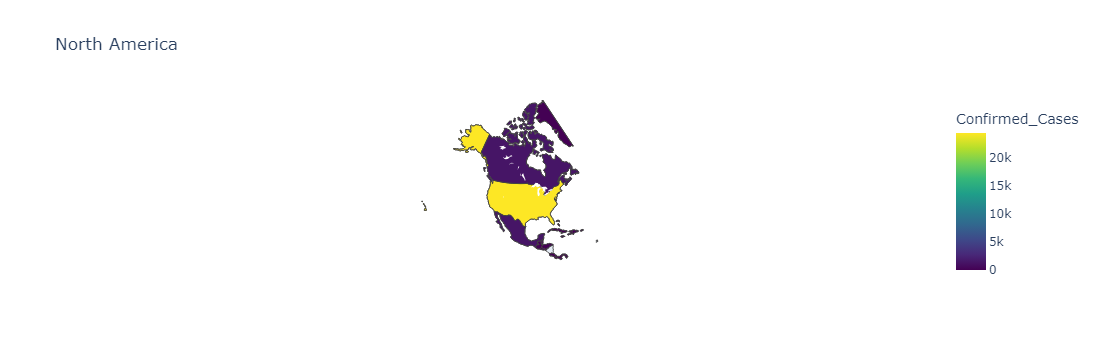

In [54]:
fig = px.choropleth(cases_ww,locations= cases_ww["Country"], color_continuous_scale="Viridis", scope= "north america",
                    locationmode="country names", color="Confirmed_Cases", title="North America")
fig.show()

In [59]:
cases_timeline.Age.unique()

array([nan, '0-39', '20-44', '30-34', '25-29', '20-69', '20-64', '40-44',
       '50-59', '40-49', '30-39', '20-59', '30-59', '35-39', '15-74',
       '45-49', '55-59', '15-39', '30-50', '20-49', '50-54', '20-24',
       '15-64', '25-49', '22-55', '40-45', '26-54', '19-59', '30-54',
       '30-49', '20-40', '20-29', '15-69', '40-42', '20-50', '35-40',
       '45-50', '50-55', '31-59', '20-62', '34-46', '20-39', '25-34',
       '35-44', '45-54', '55-64', '28-43', '60-64', '5-9', '36-50',
       '20-60', '65-69', '29-41', '19-24', '25-39', '23-46', '25-53',
       '15-84', '51-65', '20-54', '20-35', '1-69', '15-19', '30-35',
       '23-50', '25-30', '20-46', '20-65', '20-25', '46-50', '0-9',
       '41-45', '0-59', '25-44', '24-29', '15-20', '20-99', '26-30',
       '22-59', '15-59', '0-29', '0-49', '22-43', '31-44', '0-14', '0-69',
       '30-60', '29-43', '25-52', '30-40', '36-42', '18-61', '21-54'],
      dtype=object)

In [60]:
cases_timeline['Age'] = cases_timeline['Age'].fillna('0')
cases_timeline['Age'] = cases_timeline['Age'].apply(lambda x: np.array(x.split('-'), dtype=int).mean())
cases_timeline['Age'] = np.ceil(cases_timeline['Age']).astype(int)

In [61]:
cases_timeline.Age.unique()


array([ 0, 20, 32, 27, 45, 42, 55, 35, 40, 37, 47, 57, 52, 22, 39, 43, 30,
       25, 41, 38, 48, 53, 50, 60, 36, 62,  7, 67, 58, 28, 17, 33, 23,  5,
       18, 15])

In [63]:
cases_timeline.Age.value_counts().sort_values(ascending=False)

Age
0     62591
45      884
40      606
42      460
50      190
35      147
32      136
37      104
60       60
39       55
27       54
30       50
43       33
25       23
41       22
22       22
33       19
47       14
36       12
38       12
52        9
20        6
55        5
28        5
57        4
23        4
58        3
17        2
18        2
5         2
62        2
67        2
7         2
48        2
53        1
15        1
Name: count, dtype: int64

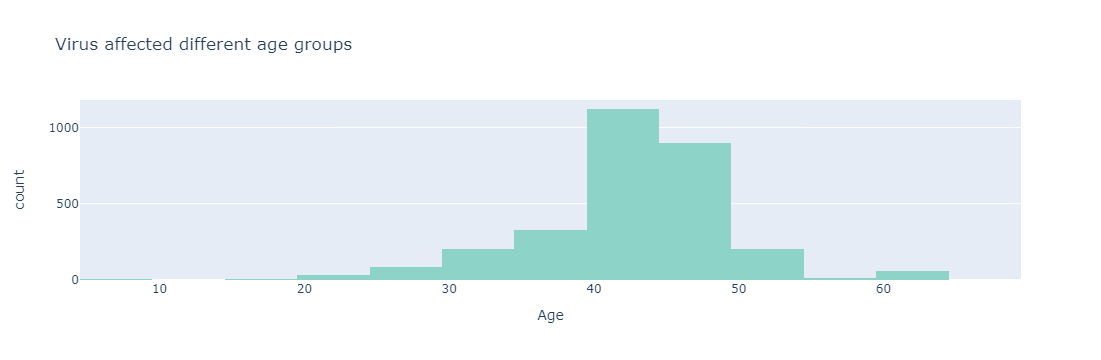

In [64]:
ages_selected = cases_timeline[cases_timeline['Age']>0]
fig = px.histogram(ages_selected,x='Age',nbins=25,color_discrete_sequence = px.colors.qualitative.Set3, title="Virus affected different age groups")
fig.show()

In [79]:
mp_cases_confirmed= pd.read_csv(r"C:\Users\hch0a\OneDrive\Desktop\Monkeypox\Data\Daily_Country_Wise_Confirmed_Cases.csv")

In [80]:
mp_cases_confirmed.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,29,0,0


In [81]:
mp_cases_confirmed.set_index('Country', inplace=True)
mp_cases_confirmed.head()

,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-08,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
Country,,,,,,,,,,,,,,,,,,,,,
Nigeria,3,0,1,0,6,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
Cameroon,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Central African Republic,0,0,0,2,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Republic of Congo,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
England,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,29,0,0


In [82]:
daily_country_cases = mp_cases_confirmed.T
daily_country_cases.head()


Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Belgium,...,Paraguay,South Sudan,El Salvador,Hong Kong,Egypt,Jordan,Guam,Ukraine,Bahrain,China
2022-01-31,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
daily_country_cases['Total_cases'] = daily_country_cases.sum(axis=1)
daily_country_cases['Total_cases']

2022-01-31       3
2022-02-17       3
2022-02-28       1
2022-03-04       2
2022-03-31       6
              ... 
2022-09-18       4
2022-09-19    1355
2022-09-20     660
2022-09-21     486
2022-09-22     311
Name: Total_cases, Length: 141, dtype: int64

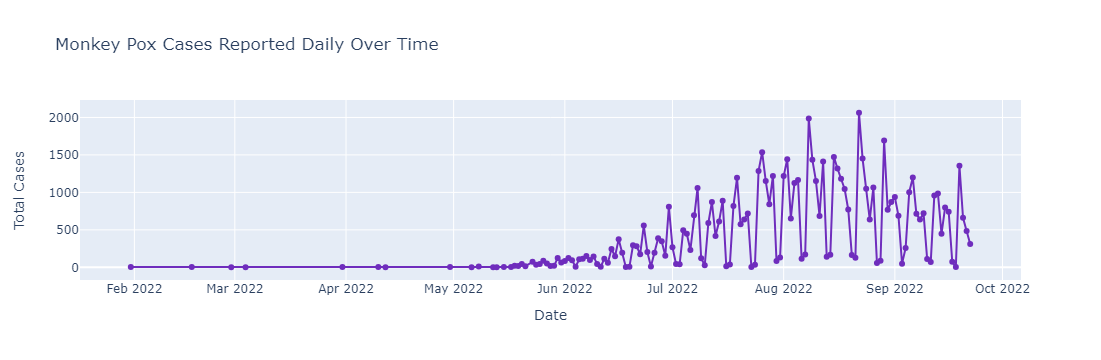

In [84]:
fig = px.line(daily_country_cases, y='Total_cases',labels={'Total_cases':'Total Cases','index':'Date'},
              title='Monkey Pox Cases Reported Daily Over Time',color_discrete_sequence=['#6F2DBD'], markers=True)
fig.update_layout(hovermode="x")
fig.show()

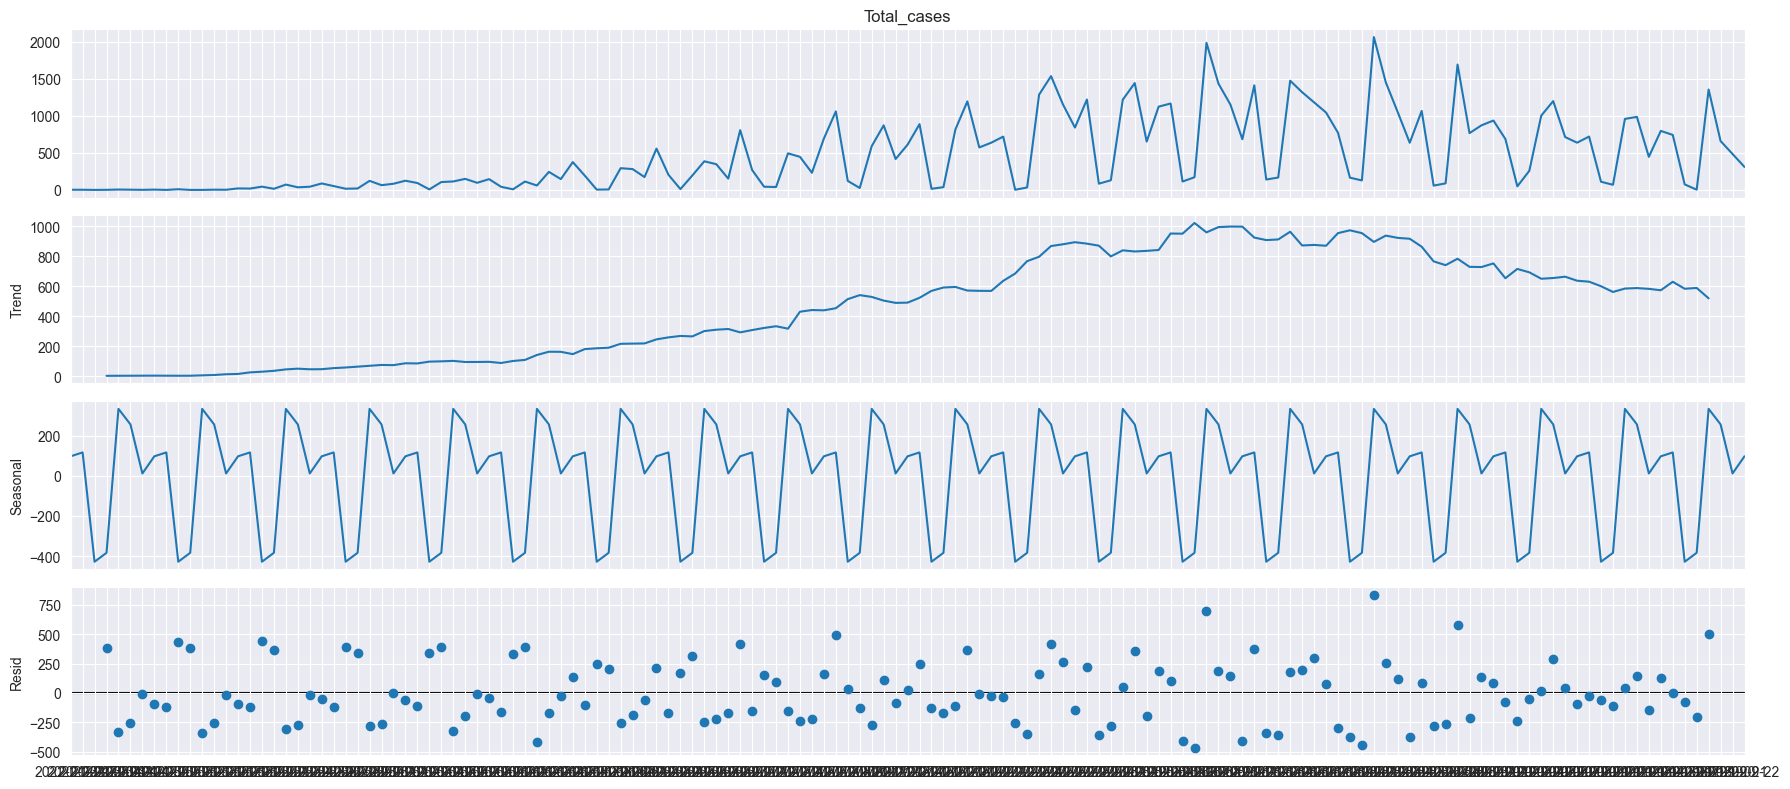

In [88]:
plt.rcParams['figure.figsize'] = (18, 8)

decomposition = sm.tsa.seasonal_decompose(daily_country_cases['Total_cases'], model = 'additive',period=7)
fig = decomposition.plot()
plt.show()

In [89]:
#####################################
assing_data=adfuller(daily_country_cases['Total_cases'])

def adf_test(cases):
    result=adfuller(cases)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

In [90]:
adf_test(daily_country_cases['Total_cases'])


Test parameters : -1.462073667112627
p-value : 0.552182638730475
#Lags Used : 13
Dataset observations : 127
Dataset is non-stationary 


In [91]:
daily_country_cases['Differencing']=daily_country_cases['Total_cases']-daily_country_cases['Total_cases'].shift(2)
daily_country_cases.head(20)

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Belgium,...,El Salvador,Hong Kong,Egypt,Jordan,Guam,Ukraine,Bahrain,China,Total_cases,Differencing
2022-01-31,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,NaN
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,NaN
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-2.0
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,-1.0
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,5.0
2022-04-10,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2.0
2022-04-12,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,-4.0
2022-04-30,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1.0
2022-05-06,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.0
2022-05-08,0,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,10,5.0


In [92]:
adf_test(daily_country_cases['Differencing'].dropna())


Test parameters : -2.6333194105394235
p-value : 0.08630448038341432
#Lags Used : 13
Dataset observations : 125
Dataset is non-stationary 


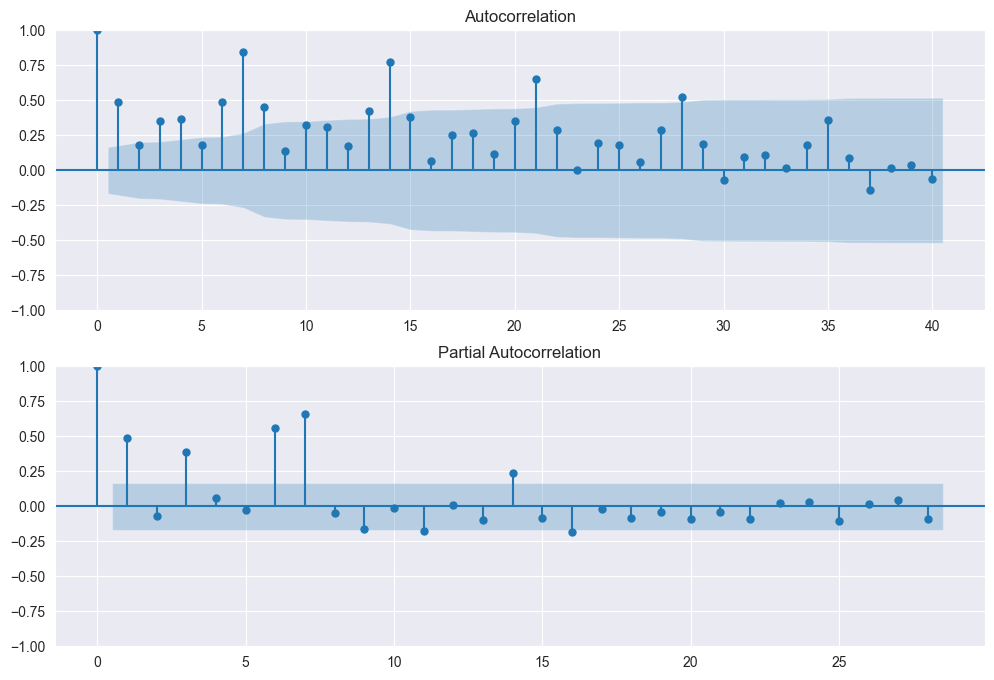

In [93]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(daily_country_cases['Total_cases'].iloc[2:],lags=40,ax=ax1)
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(daily_country_cases['Total_cases'].iloc[2:],lags=28,ax=ax1)

In [94]:
daily_country_cases.index = pd.DatetimeIndex(daily_country_cases.index).to_period('D')

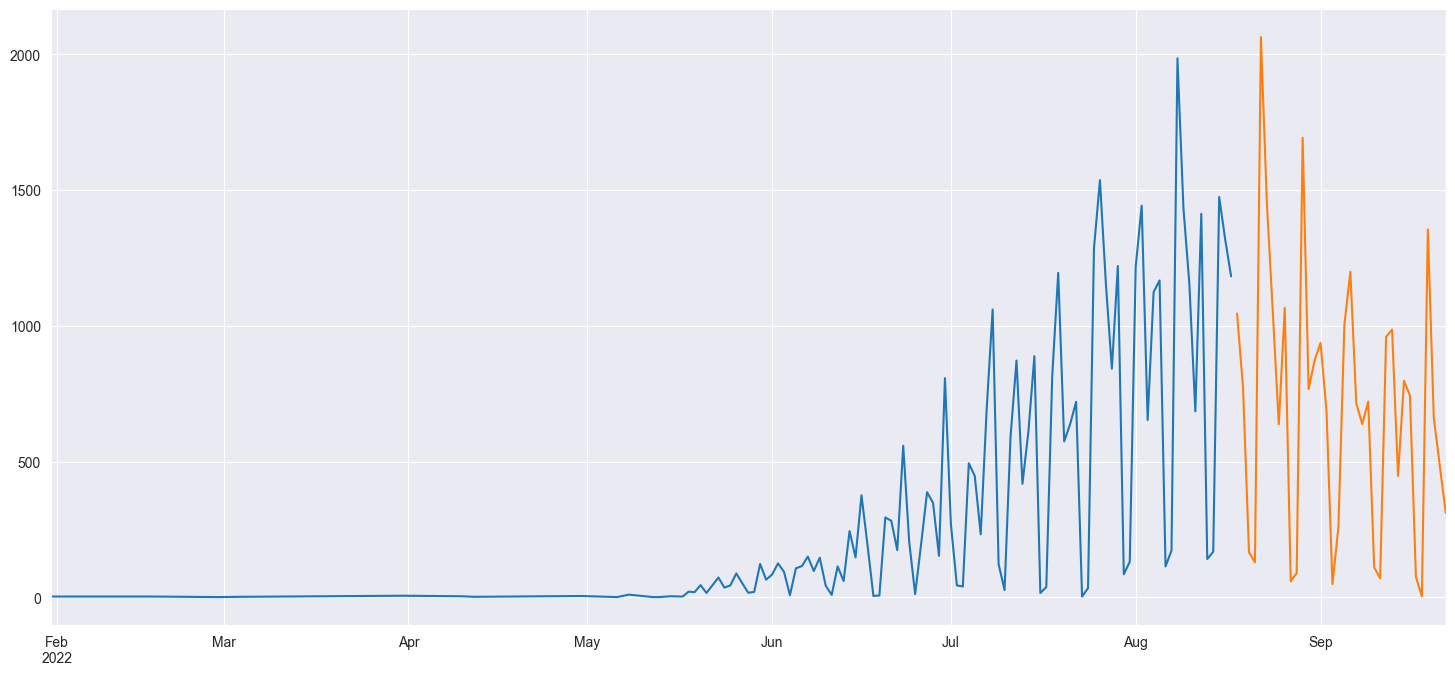

In [95]:
train = daily_country_cases[:int(0.75*(len(daily_country_cases)))]
test = daily_country_cases[int(0.75*(len(daily_country_cases))):]

#plotting the data
train['Total_cases'].plot()
test['Total_cases'].plot()
plt.show()

In [96]:
model=sm.tsa.arima.ARIMA(daily_country_cases['Total_cases'],order=(9,1,7))
arima_model = model.fit()

In [97]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total_cases   No. Observations:                  141
Model:                 ARIMA(9, 1, 7)   Log Likelihood                -948.106
Date:                Fri, 08 Dec 2023   AIC                           1930.211
Time:                        23:30:04   BIC                           1980.219
Sample:                    01-31-2022   HQIC                          1950.533
                         - 09-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2308      0.284     -0.813      0.416      -0.787       0.325
ar.L2          0.5314      0.230      2.307      0.021       0.080       0.983
ar.L3         -0.0574      0.076     -0.756      0.449      -0.206       0.091
ar.L4         -0.0673      0.099     -0.682      0.495      -0.261       0.126
ar.L5         -0.0189      0.094     -0.202      0.840      -0.202       0.164
ar.L6          0.0069      0.078      0.090      0.929      -0.145       0.159
ar.L7          0.7719      0.081      9.558      0.000       0.614       0.930
ar.L8          0.1653      0.213      0.775      0.438      -0.253       0.583
ar.L9         -0.5367      0.205     -2.622      0.009      -0.938      -0.136
ma.L1         -0.7499      0.291     -2.579      0.010      -1.320      -0.180
ma.L2         -0.8770      0.254     -3.454      0.001      -1.375      -0.379
ma.L3          0.6718      0.259      2.595      0.009       0.164       1.179
ma.L4          0.2714      0.241      1.126      0.260      -0.201       0.744
ma.L5         -0.5067      0.185     -2.743      0.006      -0.869      -0.145
ma.L6          0.1629      0.205      0.796      0.426      -0.238       0.564
ma.L7          0.1638      0.168      0.974      0.330      -0.166       0.493
sigma2      4.958e+04   6485.422      7.645      0.000    3.69e+04    6.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              21.08   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

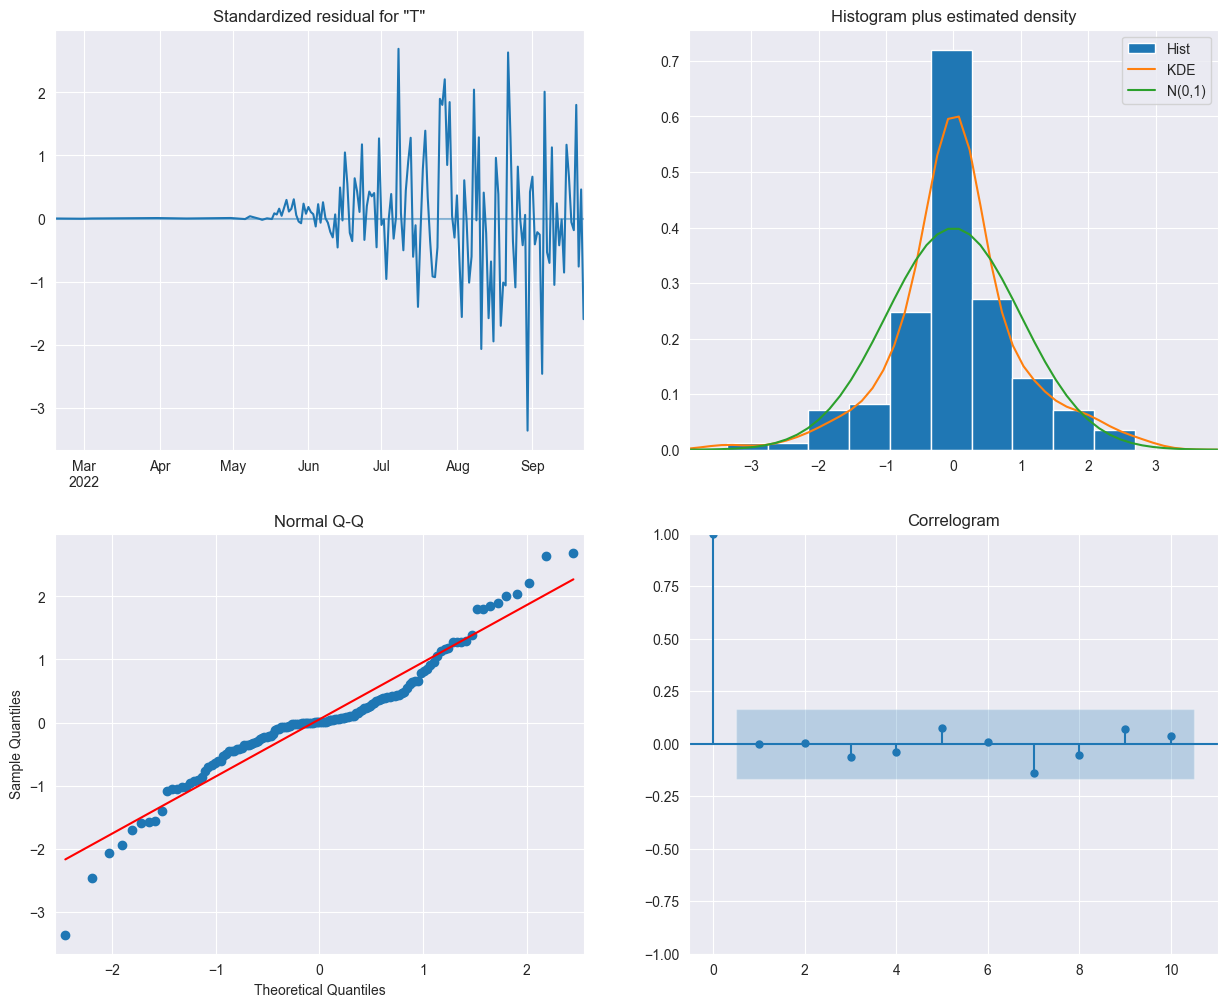

In [98]:
arima_model.plot_diagnostics(figsize=(15,12))
plt.show()

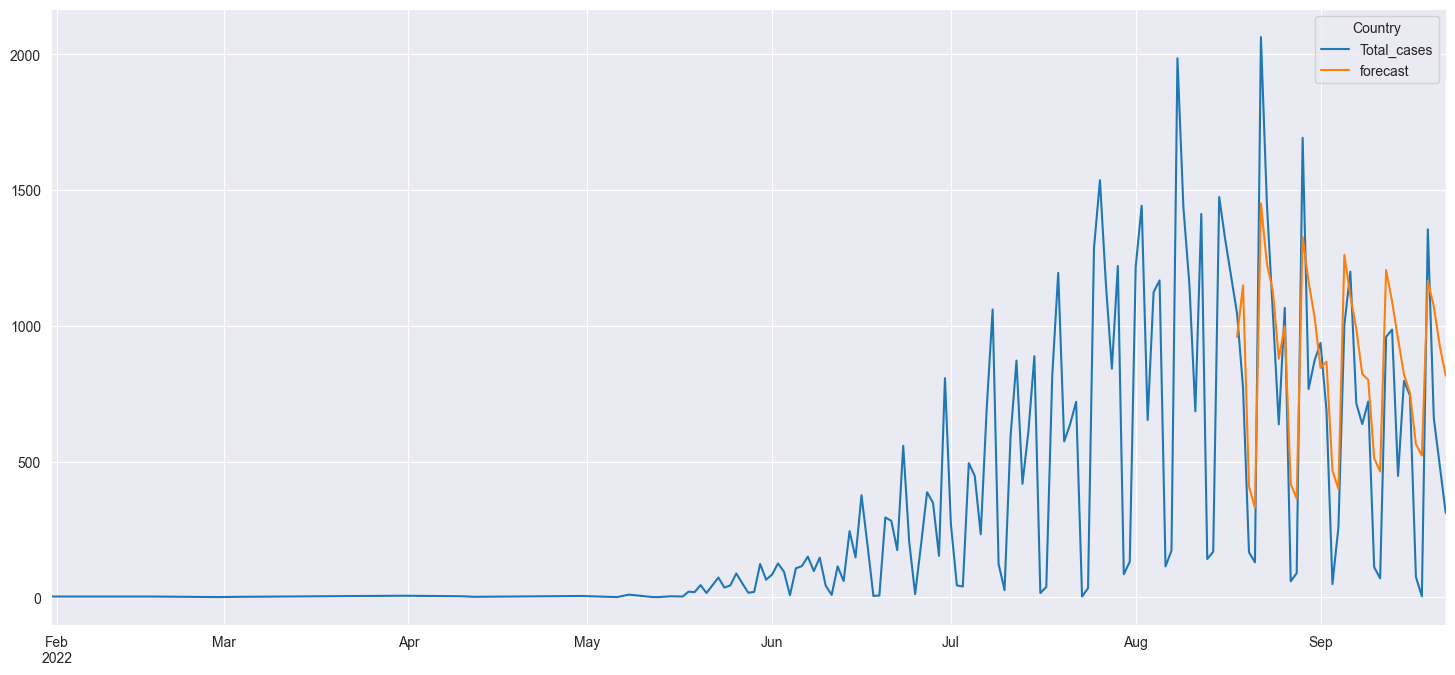

In [99]:
start_index = test.index.min()
end_index = test.index.max()

daily_country_cases['forecast']=arima_model.predict(start=start_index,end=end_index,dynamic=True)
daily_country_cases[['Total_cases','forecast']].plot(figsize=(18,8))
plt.show()